In [123]:
# librerie utilizzate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sp
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec

# DISCOVERY: OBIETTIVI DELL'ANALISI

In primo luogo indagare le possibili cause di passaggio a Non-Performing Loan (NPL) di una posizione debitoria in modo tale da avere una panoramica generale sulle posizioni ad oggi in sofferenza per porre in essere azioni di recupero e attenzionare in futuro, in fase di istruttoria e delibera di affidamento, i fattori individuati.    

In secondo luogo creare una dashboard che analizzi il portafoglio crediti dell'agenzia per identificare eventuali trend e monitorare la salute del portafoglio stesso.

# DATA SELECTION

In [124]:
# carico il file contente il dataset
credito=pd.read_csv('credit_risk_dataset.csv')

In [125]:
# visualizzo un sample del df
credito.sample(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
8225,22,56004,MORTGAGE,6.0,MEDICAL,A,6000,7.88,0,0.11,N,4
14490,25,108000,MORTGAGE,10.0,HOMEIMPROVEMENT,B,24250,10.75,0,0.22,N,2
11460,22,75000,MORTGAGE,6.0,MEDICAL,C,15000,14.27,0,0.20,N,2
20706,27,35000,RENT,9.0,DEBTCONSOLIDATION,B,5000,11.49,0,0.14,N,8
14624,21,110000,MORTGAGE,0.0,VENTURE,A,20000,NaN,0,0.18,N,4
26216,32,98300,MORTGAGE,3.0,VENTURE,C,5000,12.23,0,0.05,N,10
30139,46,60070,RENT,2.0,PERSONAL,C,5500,14.22,0,0.09,Y,17
13261,25,45600,RENT,3.0,MEDICAL,D,12250,14.84,1,0.27,N,3
6217,23,28000,RENT,0.0,EDUCATION,A,6000,9.63,0,0.21,N,4
7794,26,38000,RENT,5.0,EDUCATION,A,7000,7.51,0,0.18,N,3


**VALORI COLONNE:**  
person_age: età  
person_income: reddito annuo dell'affidato  
person_home_ownership: tipo di proprietà sull'abitazione dell'affidato  
person_emp_length: anni di lavoro dell'affidato (in anni)  
loan_intent: motivazione della richiesta di credito  
loan_grade: rating assegnato  
loan_amnt: importo concesso  
loan_int_rate: tasso di interesse  
loan_status	Loan status: 0 is non default (credito non in sofferenza), 1 is default (credito in sofferenza)  
loan_percent_income: percentuale di prestito rispetto al reddito  
cb_person_default_on_file: indica se ci sono stati o meno default in passato (Y si, N no)
cb_preson_cred_hist_length: lunghezza della storia creditizia  

In [126]:
# visualizzo le info del df per controllare che i data type siano corretti per ogni colonna
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


I data type sono correttamente attribuiti, valuterò nel corso dell'analisi se trasformare il contenuto della colonna:  
- loan_status in stringhe "parlanti" (es. default e not default) per semplicità di analisi  
- person_emp_length in nr. interi; potrebbero infatti esserci valori con decimali da tenere in considerazione  
- cb_person_default_on_file in un booleano vero/falso per semplificare l'analisi

In [127]:
# conteggio dei valori nulli
credito.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Ci sono solo due colonne che presentano valuri nulli:  
- person_emp_length: i valori nulli rappresentano circa il 3% del totale dei dati  
- loan_int_rate: i valori nulli rappresentano il 9,5% del totale dei dati, cercerò di trovare il modo più puntuale di stima in quanto lo ritengo un valore fondamentale nell'analisi dei debiti in default

In [128]:
#  conteggio dei duplicati
credito.duplicated().sum()

165

Visto che i duplicati rappresentano lo 0,5% dei record si provvederà a cancellarli nella parte di data cleaning.

In [129]:
# visualizzo le statistiche
credito.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.14,6322.09,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


CONSIDERAZIONI SULLE STATISTICHE:  
- PERSON AGE: si nota che sicuramente c'è qualche valore errato in quanto il massimo è pari a 144  
- PERSON INCOME: anche in questo caso il valore massimo si discosta molto dal 75% delle osservazioni, potrebbero esserci degli outlier o dei valori errati  
- PERSON EMP LENGTH: il massimo è un valore palsemente errato che andrà sistemato; per quanto riguarda il minimo bisogna capire se 0 sia o meno un valore errato (ci sono dei prestiti studenteschi e quindi potrebbe essere che qualche soggetto non abbia mai lavorato, strano però che il reddito minimo sia 4000 e non 0 - potrebbero lavorare da meno di un anno?). Inolte e' strano anche che la maggior parte dei dati si concetri tra 2 e 7 anni.  
- LOAN INT RATE: i tassi sono molto alti ma il dataset è una simulazione non una raccolta dati reali (scritto su kaggel) quindi i tassi verranno dati per buoni e cercherò solo di capire se ci sono eventuali outlier  

Le ultime tre colonne non hanno particolari problemi da evidenziare, farò un controllo per capire se la loan_percent_income è corretta o meno mentre per quanto riguarda i dati sulla storia creditizia penso siano in anni (anche in questo caso magari farò un controllo circa la coerenza tra età del soggetto e lunghezza della storia creditizia).

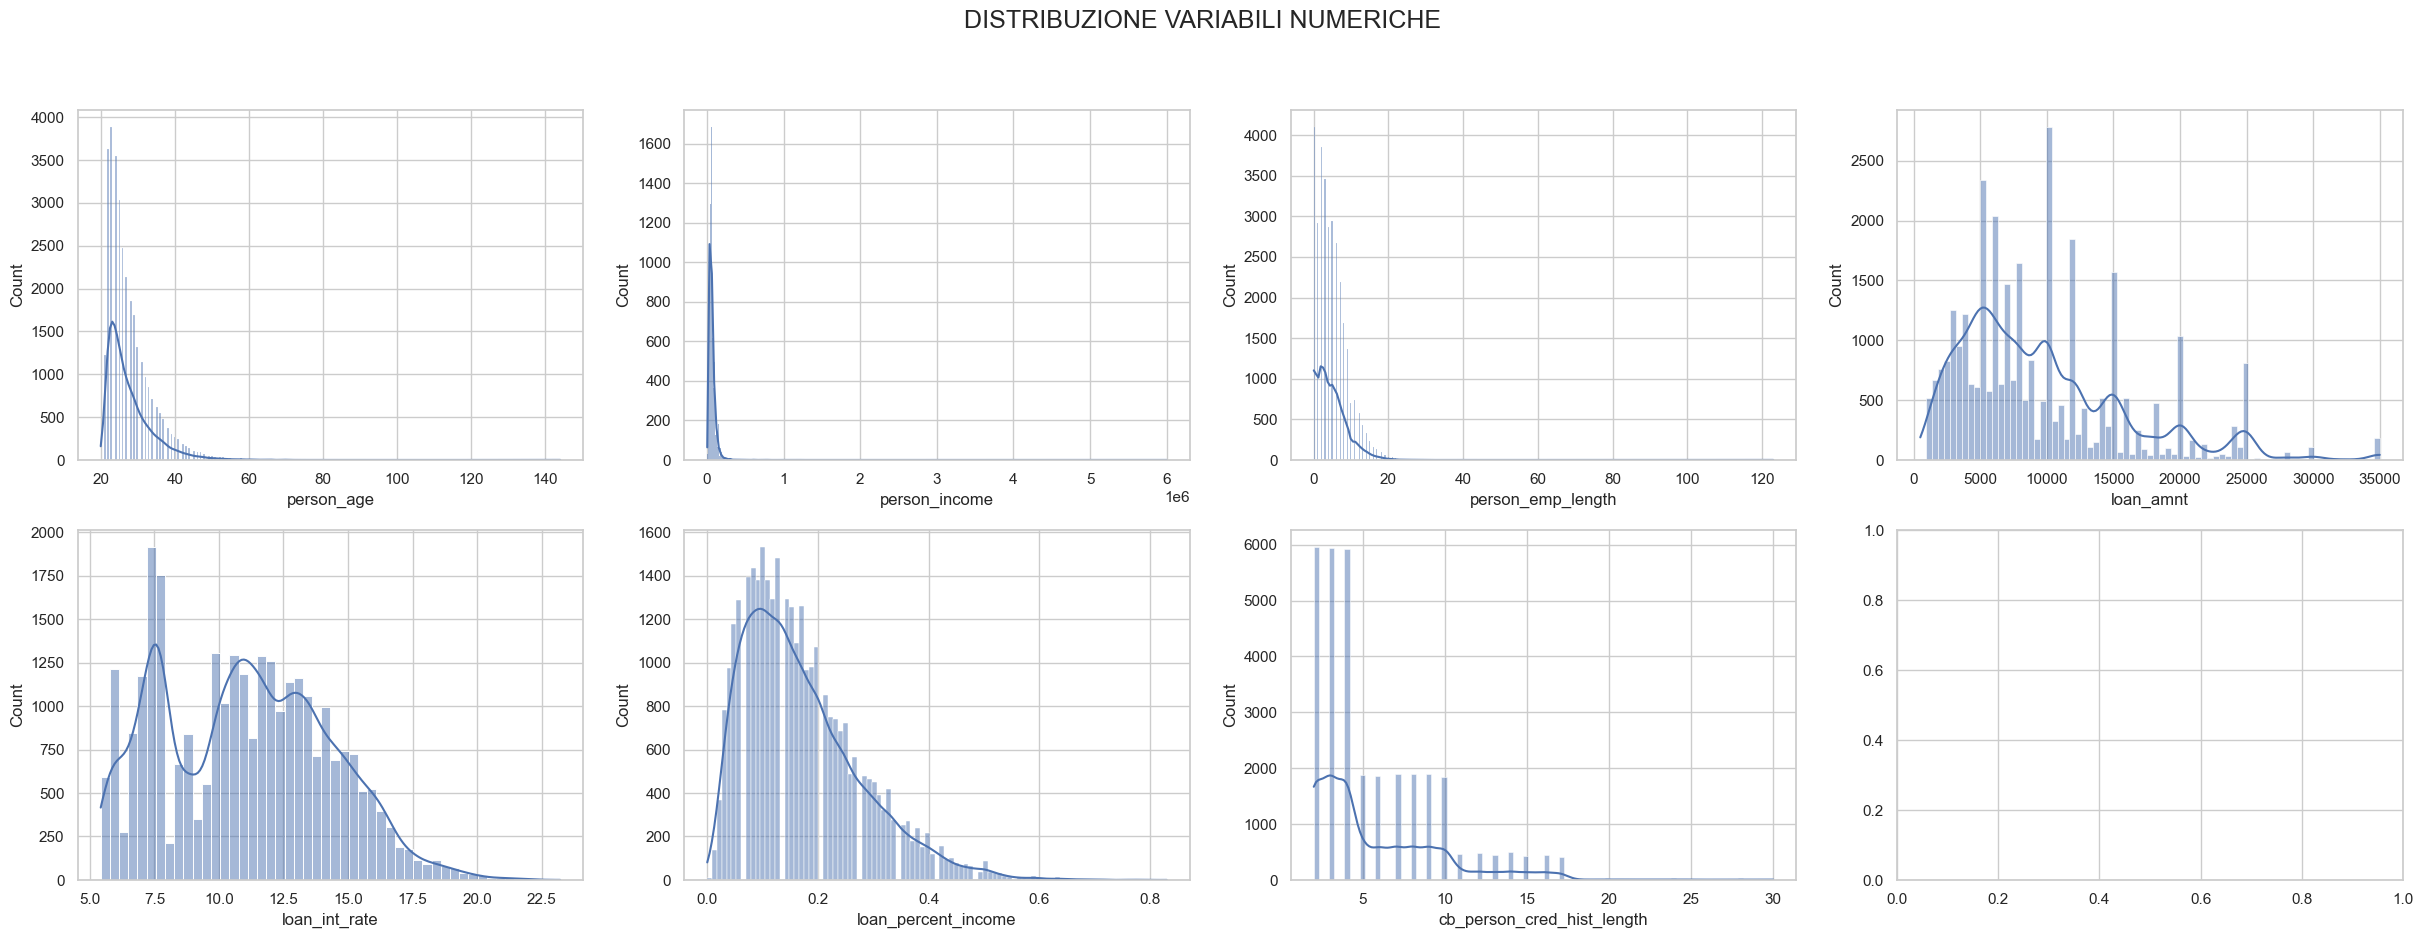

In [130]:
# creo un subplot per la rappresentazione della distribuzione delle varibili numeriche
fig,ax=plt.subplots(2,4,figsize=(30,10))
fig.suptitle('DISTRIBUZIONE VARIABILI NUMERICHE',fontsize=18)

# inserisco degli istogrammi delle variabili numeriche nella prima riga
colonne=['person_age','person_income','person_emp_length','loan_amnt']

for indice,valore in enumerate(colonne):
    sns.histplot(data=credito,x=valore,kde=True,ax=ax[0,indice])

# inserisco degli istogrammi delle variabili numeriche nella seconda riga
colonne=['loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

for indice,valore in enumerate(colonne):
    sns.histplot(data=credito,x=valore,kde=True,ax=ax[1,indice])

Non tutti gli istogrammi presentano una distribuzione normale, in alcuni casi (importo e tasso di interesse) troviamo distrubuzioni multimodali. Per i grafici in cui ci sono code piu' lunghe sulla destra (es. età) devo indagare se ci siano outlier oppure valori errati. Analizzo prima di procedere quest'ultima casistica.

# DATA CLEANING  
Come prima cosa elimino i duplicati mantenendo solo la prima occorrenza.

In [131]:
# Eliminazione dei duplicati
credito=credito.drop_duplicates(keep='first')

# Conto i duplicati
credito.duplicated().sum()

0

Valuto come sistemare i valori anomali rilevati.

In [132]:
# Controllo nella colonna dell'eta' del df quanti valori sono sopra gli 70 anni per vedere quali e quante eta' sono da aggiustare
credito[credito['person_age']>=70]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32334,70,30000,RENT,0.0,DEBTCONSOLIDATION,D,1000,17.49,1,0.03,Y,21
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32381,73,42000,MORTGAGE,7.0,PERSONAL,A,5000,7.49,0,0.12,N,28
32383,70,30000,RENT,1.0,MEDICAL,B,5000,10.96,0,0.17,N,28


Ci sono 5 record con età palesemente errate visto che superano di molto i 100 anni, ma potrebbe essere stato aggiunto un 1 davanti all'età effettiva. Guardando poi la durata lavorativa è molto bassa rispetto all'età senza l'uno davanti e anche rispetto al reddito percepito.  

Considerando che:  
- non c'è modo di ricavare in maniera logica e precisa l'età da altri dati
- il fatto che potrebbe essere stato aggiunto erroneamente un 1 davanti all'età effettiva è una mia congettura non supportata da fatti evidenti  
- i dati sono gia' alla fonte frutto di una simulazione, pertanto potrebbero essere semplicemente degli errori di stima o degli errati parametri applicati alla generazione del df  
- i record errati sono solo 5 su 32.581  

le righe con età anomale verranno eliminate.

In [133]:
# eliminazione dei record errati
credito.drop([81,183,575,747,32297], inplace=True)
credito=credito.reset_index(drop=True) # sistemo l'indice
credito[credito['person_age']>=70] # controllo che i record siano stati correttamente eliminati

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32164,70,30000,RENT,0.0,DEBTCONSOLIDATION,D,1000,17.49,1,0.03,Y,21
32185,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32190,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32211,73,42000,MORTGAGE,7.0,PERSONAL,A,5000,7.49,0,0.12,N,28
32213,70,30000,RENT,1.0,MEDICAL,B,5000,10.96,0,0.17,N,28
32215,70,44000,MORTGAGE,3.0,PERSONAL,C,7000,11.66,0,0.16,N,24
32246,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27
32252,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,0,0.11,N,25
32262,73,75000,RENT,0.0,MEDICAL,A,7800,NaN,0,0.10,N,24
32266,70,42000,RENT,1.0,MEDICAL,B,8000,9.63,0,0.19,N,24


In [134]:
# contollo nella colonna della durata lavorativa i valori maggiori di 40 o maggiore dell'età del soggetto
credito[(credito['person_emp_length']>=40) | (credito['person_emp_length']>credito['person_age'])]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
208,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
32185,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25


Ho scelto 40 come valore in quanto, fatta eccezione per i 123 anni, 41 è la durata massima di anni lavorati.  
In questo caso i dati errati verranno stimati prendendo come valore la mediana (visto che la distribuzione è asimetrica) del person_emp_length per le varie età di riferimento, essendo solo due record questo non inciderà molto sui risultati.

In [135]:
# sostituisco i valori errati
diz={0:22,208:21}

for chiave, valore in diz.items():
    mediana = credito[credito['person_age'] == valore]['person_emp_length'].median()
    credito.at[chiave, 'person_emp_length'] = mediana

In [136]:
# controllo il risultato
credito.iloc[0:209]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,4.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
204,25,72612,RENT,9.0,MEDICAL,C,25000,13.11,1,0.34,N,2
205,23,74000,RENT,3.0,MEDICAL,B,25000,10.36,1,0.34,N,3
206,25,75000,RENT,9.0,DEBTCONSOLIDATION,B,25000,10.36,1,0.33,N,2
207,24,192000,RENT,0.0,MEDICAL,C,22000,NaN,0,0.11,Y,2


In [137]:
# contollo nella colonna della durata lavorativa i valori = 0 e scopo del prestito diverso da educazione (valore potenzialmente errato)
credito[(credito['person_emp_length']==0) & (credito['loan_intent']!='EDUCATION')]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3
27,23,11000,OWN,0.0,PERSONAL,A,1400,9.32,0,0.13,N,3
49,26,89028,RENT,0.0,DEBTCONSOLIDATION,A,30000,6.62,1,0.34,N,3
56,26,277104,RENT,0.0,VENTURE,B,20000,11.48,0,0.07,N,3
60,21,131000,RENT,0.0,VENTURE,A,30000,5.99,0,0.23,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32362,70,132000,MORTGAGE,0.0,PERSONAL,A,14000,NaN,0,0.11,N,24
32377,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32394,53,45000,RENT,0.0,PERSONAL,C,5600,13.79,0,0.12,N,28
32402,52,52000,OWN,0.0,PERSONAL,A,9600,8.49,0,0.18,N,22


In [138]:
# controllo la mediana del rapporto di lavoro per diversi gruppi di età
anni=[20,30,40,50,60,70,80,94]

for indice,valore in enumerate(anni):
    x=credito[(credito['person_age']==valore)]['person_emp_length'].median()
    print(f"La mediana relativa alla durata lavorativa per i {valore} anni è di {x}")


La mediana relativa alla durata lavorativa per i 20 anni è di 4.0
La mediana relativa alla durata lavorativa per i 30 anni è di 4.0
La mediana relativa alla durata lavorativa per i 40 anni è di 4.0
La mediana relativa alla durata lavorativa per i 50 anni è di 4.0
La mediana relativa alla durata lavorativa per i 60 anni è di 2.0
La mediana relativa alla durata lavorativa per i 70 anni è di 0.5
La mediana relativa alla durata lavorativa per i 80 anni è di 7.0
La mediana relativa alla durata lavorativa per i 94 anni è di 1.0


Tenuto conto che nella colonna person_emp_length:  
- ci sono parecchi valori pari a 0 (circa il 13% del totale) e ci sono 895 valori nulli  
- guardando le mediane di durata lavorativa delle varie età "tonde" (quindi 20,30, etc) si nota che queste sono simili tra loro  
- è stato verificato che lo 0 non corrisponde sempre ad una richiesta di prestito per motivi educativi  
- non ci sono redditi pari a 0 e alcuni soggetti con anni lavorati pari a 0 hanno redditi veramente elevati (es. riga 56,60,32527)

ritengo che la colonna person_emp_length sia inutilizzabile ai fini dell'analisi. 

Ho pensato anche che i soggetti con 0 anni di lavoro potessero essere redditieri, tuttavia le mediane (utilizzate al posto della media in quanto la distribuzione è asimetrica) mostrano dei risultati non coerenti con le età analizzate quindi credo che gli zeri siano frutto di un errore.

In [139]:
# elimino la colonna person_emp_length
credito.drop('person_emp_length', axis=1, inplace=True)
credito

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32406,57,53000,MORTGAGE,PERSONAL,C,5800,13.16,0,0.11,N,30
32407,54,120000,MORTGAGE,PERSONAL,A,17625,7.49,0,0.15,N,19
32408,65,76000,RENT,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32409,56,150000,MORTGAGE,PERSONAL,B,15000,11.48,0,0.10,N,26


In [140]:
# controllo che la colonna loan_percent_income sia correttamente calcolata (ovvere che le percentuali riportate corrispondano a quelle effettive)
loan_real_percent=(credito['loan_amnt']/credito['person_income']).round(2) # calcolo la percentuale effettiva
(loan_real_percent == credito['loan_percent_income']).value_counts() # verifico che la serie loan_real_percent sia identica alla colonna loan_percent_income

True     31406
False     1005
dtype: int64

In [141]:
# visto il risultato correggo la colonna loan_percent_income
credito['loan_percent_income']=(credito['loan_amnt']/credito['person_income']).round(2)

In [142]:
# controllo che l'età degli affidati non sia mai inferiore o uguale alla lunghezza della storia creditizia
credito[credito['person_age']<=credito['cb_person_cred_hist_length']]

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [143]:
# controllo che la lunghezza della storia creditizia sia coerente con l'età dei soggetti
credito[(credito['person_age']-18)<credito['cb_person_cred_hist_length']]

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
35,21,12000,OWN,EDUCATION,A,2500,7.51,1,0.21,N,4
60,21,131000,RENT,VENTURE,A,30000,5.99,0,0.23,N,4
77,21,12000,OWN,PERSONAL,C,4200,13.48,1,0.35,Y,4
147,21,13200,OWN,VENTURE,C,4500,12.98,1,0.34,N,4
166,21,200000,MORTGAGE,EDUCATION,C,16000,14.65,0,0.08,N,4
...,...,...,...,...,...,...,...,...,...,...,...
28663,27,49000,MORTGAGE,MEDICAL,B,8500,10.59,0,0.17,N,10
28865,27,56253,RENT,HOMEIMPROVEMENT,B,10000,11.36,0,0.18,N,10
28879,27,40000,RENT,VENTURE,D,10000,NaN,0,0.25,Y,10
28887,27,84000,MORTGAGE,DEBTCONSOLIDATION,A,7000,7.29,0,0.08,N,10


Dai dati emerge che alcuni soggetti hanno chiesto prestiti da minorenni, verifico quale sia stata l'età minima registrata.

In [144]:
# calcolo dell'età minima
(credito['person_age']-credito['cb_person_cred_hist_length']).min()

16

Negli USA (vari fattori rilevati fino ad ora ed anche in seguito mi fanno presumere che il df sia riferito ad agenzie americane - causali e tassi di interesse) è possibile richiedere prestiti in casi particolari anche da soggetti minori se supervisionati da un adulto, per questo motivo i dati verranno mantenuti inalterati.

# DATA CLEANING: GESTIONE VALORI NULLI
All'inizio dell'analisi sono emersi dei valori nulli nella colonna dei tassi di interesse che rappresentavano quasi il 10% dei dati.  
I tassi di interesse in generale dipendono da diversi fattori visto che rappresentano il rischio/costo sostenuto dalla banca nel concedere il prestito (rating, importo richiesto, durata, etc.), quindi per la stima dei tassi verrà utilizzata la media di gruppi predefiniti.  
In pratica ogni valore mancante sarà sostituito dalla media dei tassi dei record che abbiano, rispetto al valore nullo pari:  
- scopo  
- rating  
- importo  
- stato di default

Penso sia rilevante stimare i tassi di interesse per non perdere troppi dati all'interno del df, quindi cercherò di farlo nel modo più accurato possibile.

In [145]:
# sostituisco i valori nulli con le medie di gruppi predefiniti
credito['loan_int_rate'].fillna(credito.groupby(['loan_intent', 'loan_grade', 'loan_amnt', 'loan_status'])['loan_int_rate'].transform('mean'), inplace=True)

# Verifico il risultato
credito['loan_int_rate'].isna().sum()

408

I valori nulli nella colonna del tasso sono passati da 3116 a 410 (1,3% del totale), sono diminuiti ma voglio cercare di capire come mai non si siano azzerati. Probabilmente per questi recod non sono stati trovati valori con caratteristiche uguali su cui calcolare la media.

In [146]:
credito[credito['loan_int_rate'].isna()]

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
59,24,12000,OWN,VENTURE,E,1750,NaN,0,0.15,Y,3
71,22,56950,RENT,MEDICAL,A,28000,NaN,1,0.49,N,2
83,26,12000,OWN,DEBTCONSOLIDATION,A,2700,NaN,1,0.22,N,4
84,22,108000,RENT,EDUCATION,B,28000,NaN,1,0.26,N,4
86,24,69000,RENT,HOMEIMPROVEMENT,A,27600,NaN,1,0.40,N,2
...,...,...,...,...,...,...,...,...,...,...,...
32137,54,53700,RENT,HOMEIMPROVEMENT,D,29850,NaN,1,0.56,Y,28
32139,66,60000,RENT,MEDICAL,C,27050,NaN,1,0.45,Y,28
32167,52,15000,RENT,PERSONAL,B,1200,NaN,1,0.08,N,20
32340,55,97243,MORTGAGE,PERSONAL,E,17000,NaN,0,0.17,N,30


In [147]:
# Verifico la mia ipotesi si alcune righe relative ai valori nulli
colonne_gruppo = ['loan_intent', 'loan_grade', 'loan_amnt', 'loan_status']

# riga 59
gruppo = credito[
        (credito[colonne_gruppo[0]] == 'VENTURE') &
        (credito[colonne_gruppo[1]] == 'E') &
        (credito[colonne_gruppo[2]] == 1750) &
        (credito[colonne_gruppo[3]] == 0)]

# riga 86
gruppo1 = credito[
        (credito[colonne_gruppo[0]] == 'HOMEIMPROVEMENT') &
        (credito[colonne_gruppo[1]] == 'A') &
        (credito[colonne_gruppo[2]] == 27600) &
        (credito[colonne_gruppo[3]] == 1)]

# riga 32542
gruppo2 = credito[
        (credito[colonne_gruppo[0]] == 'VENTURE') &
        (credito[colonne_gruppo[1]] == 'C') &
        (credito[colonne_gruppo[2]] == 1400) &
        (credito[colonne_gruppo[3]] == 1)]

gruppo2

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32377,53,4888,OWN,VENTURE,C,1400,NaN,1,0.29,Y,28


Pare che l'ipotesi sia corretta in quanto nei tre campioni analizzati effettivamente l'unico record risultate è quello con il tasso di interesse nullo.  

Ho scelto di procedere ad una nuova stima del tasso di interesse perchè ai fini dell'analisi dei casi di default ritengo utile non avere nessun valore nullo specialmente relativo al tasso di interesse applicato.  
Per cercare di attribuire un valore ai tassi di interesse mancanti ripeto la stima fatta in precedenza togliendo però l'importo, in questo modo dovrei riuscire ad azzerare i valori nulli. Ho deciso di eliminare l'importo dell'affidamento dai parametri del groupby perchè ritengo che tra i fattori che determinano il tasso di interesse sia il meno incisivo.

In [148]:
# sostituisco i valori nulli con le medie di gruppi predefiniti
credito['loan_int_rate'].fillna(credito.groupby(['loan_intent', 'loan_grade', 'loan_status'])['loan_int_rate'].transform('mean'), inplace=True)

# Verifico il risultato
credito['loan_int_rate'].isna().sum()

0

In [149]:
# Verifico che effettivamente tutti i valori nulli siano stati sistemati
credito.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# DATA CLEANING: GESTIONE DEGLI OUTLIER

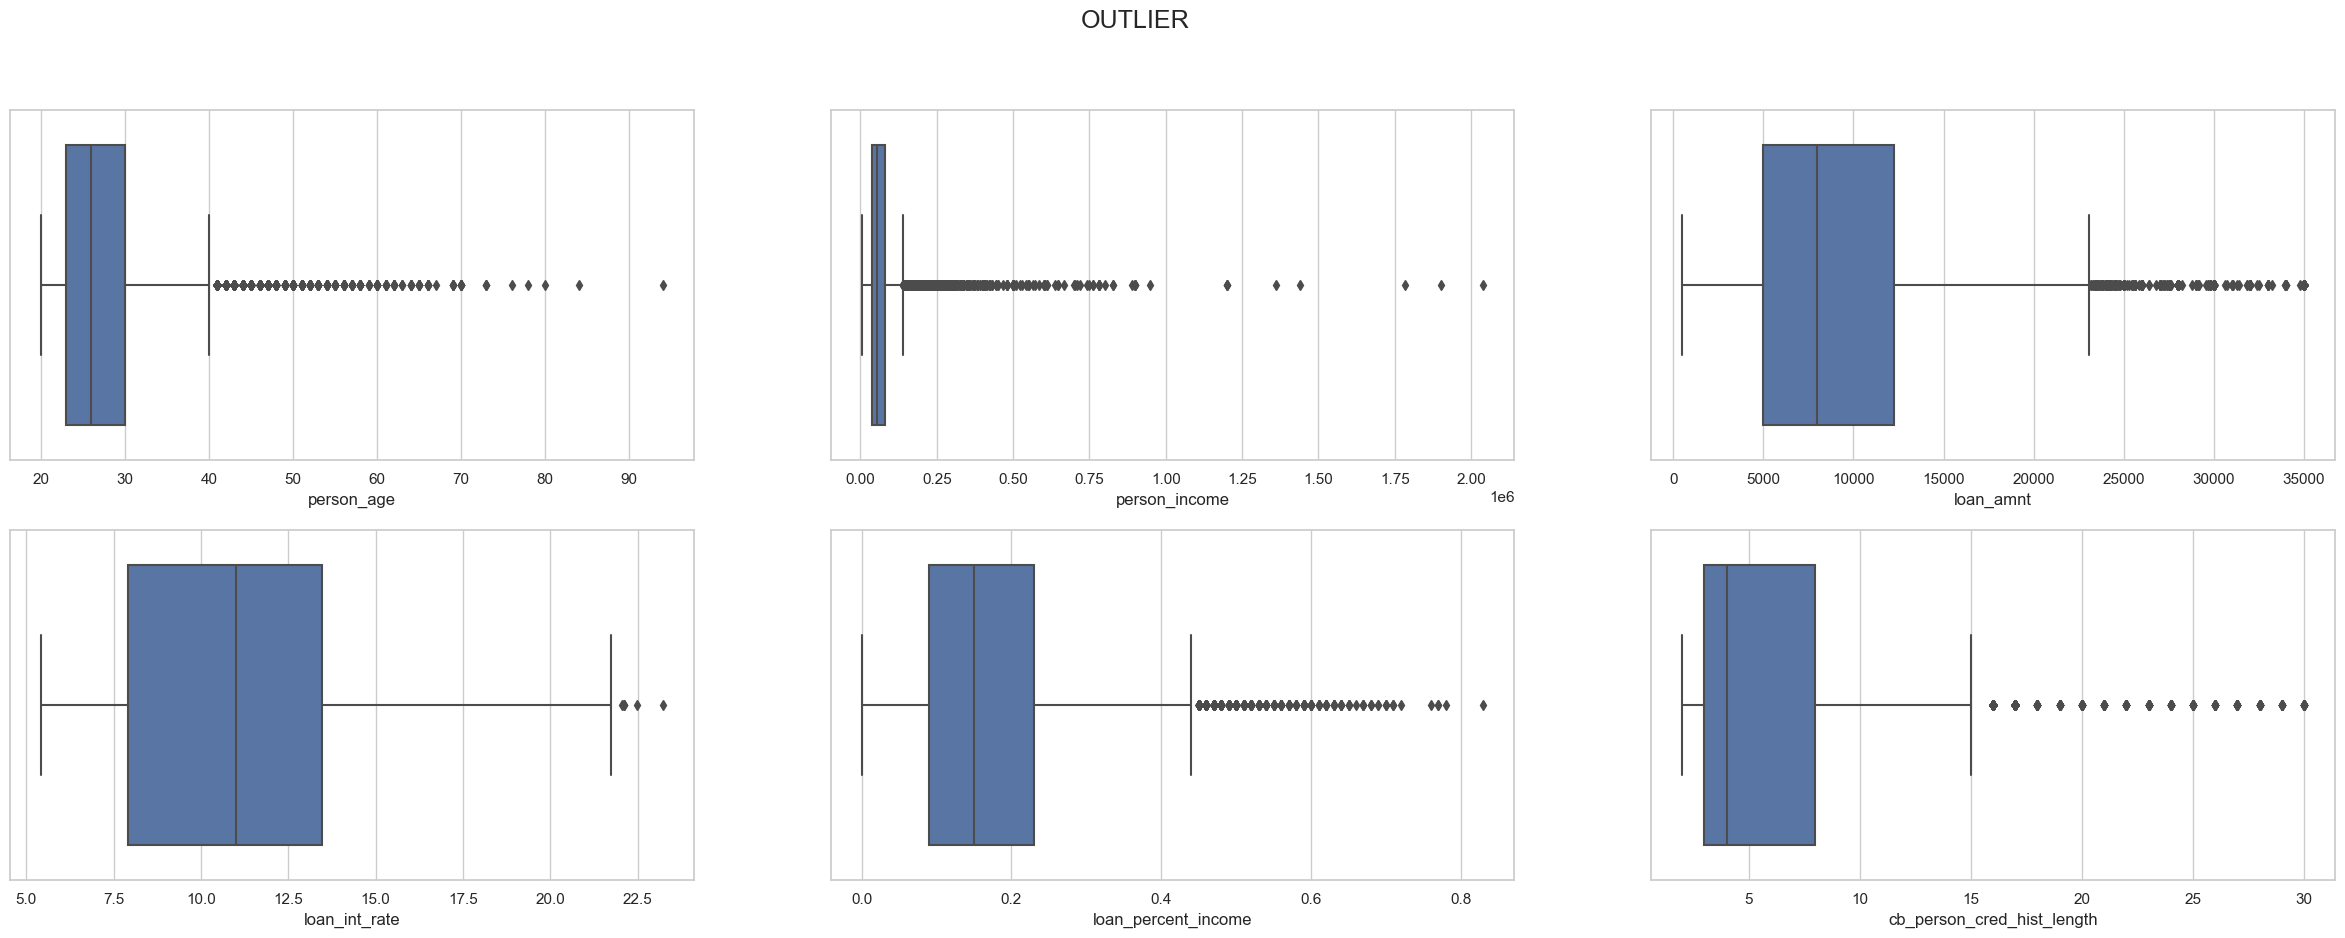

In [150]:
# creo un subplot per la rappresentazione visiva di eventuali outlier
fig,ax=plt.subplots(2,3,figsize=(30,10))
fig.suptitle('OUTLIER',fontsize=18)

# inserisco dei boxplot delle variabili numeriche nella prima riga
colonne=['person_age','person_income','loan_amnt']

for indice,valore in enumerate(colonne):
    sns.boxplot(data=credito,x=valore,ax=ax[0,indice])

# inserisco dei boxplot delle variabili numeriche nella seconda riga
colonne=['loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

for indice,valore in enumerate(colonne):
    sns.boxplot(data=credito,x=valore,ax=ax[1,indice])

In [151]:
# Conteggio degli outlier

colonne=['person_age','person_income','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
for indice, valore in enumerate(colonne):
    iqr=sp.iqr(credito[valore])
    q3=np.quantile(credito[valore],q=0.75)
    baffo=q3+(1.5*iqr)
    nr_outlier=credito[credito[valore]>=baffo].shape[0]
    percentuale = round(nr_outlier / credito.shape[0] * 100,0)
    print(f'Gli outlier nella colonna {valore} sono il {percentuale}%.')

Gli outlier nella colonna person_age sono il 5.0%.
Gli outlier nella colonna person_income sono il 5.0%.
Gli outlier nella colonna loan_amnt sono il 5.0%.
Gli outlier nella colonna loan_int_rate sono il 0.0%.
Gli outlier nella colonna loan_percent_income sono il 2.0%.
Gli outlier nella colonna cb_person_cred_hist_length sono il 4.0%.


Nella maggior parte dei casi gli outlier rappresentano il 5% dei valori della colonna di interesse, ho deciso però di mantenerli per due motivi:  
- i dati sono frutto di una stima quindi gli outlier potrebbero derivare da qualche errore nella creazione del dataset, andarli a "sistemare" comporterebbe un'ulteriore stima che potrebbe rendere la successiva analisi meno cosistente  
- i valori considerati outlier potrebbero essere interessanti ai fini dell'analisi del portafoglio crediti in quanto rappresentano comunque delle eccezioni rispetto alla norma che potrebbero risultare interessanti al fine di un efficientamento del portafoglio stesso

# DATA EXPLORATION: ANALISI UNIVARIATA  
Inizio dalle variabili categoriche

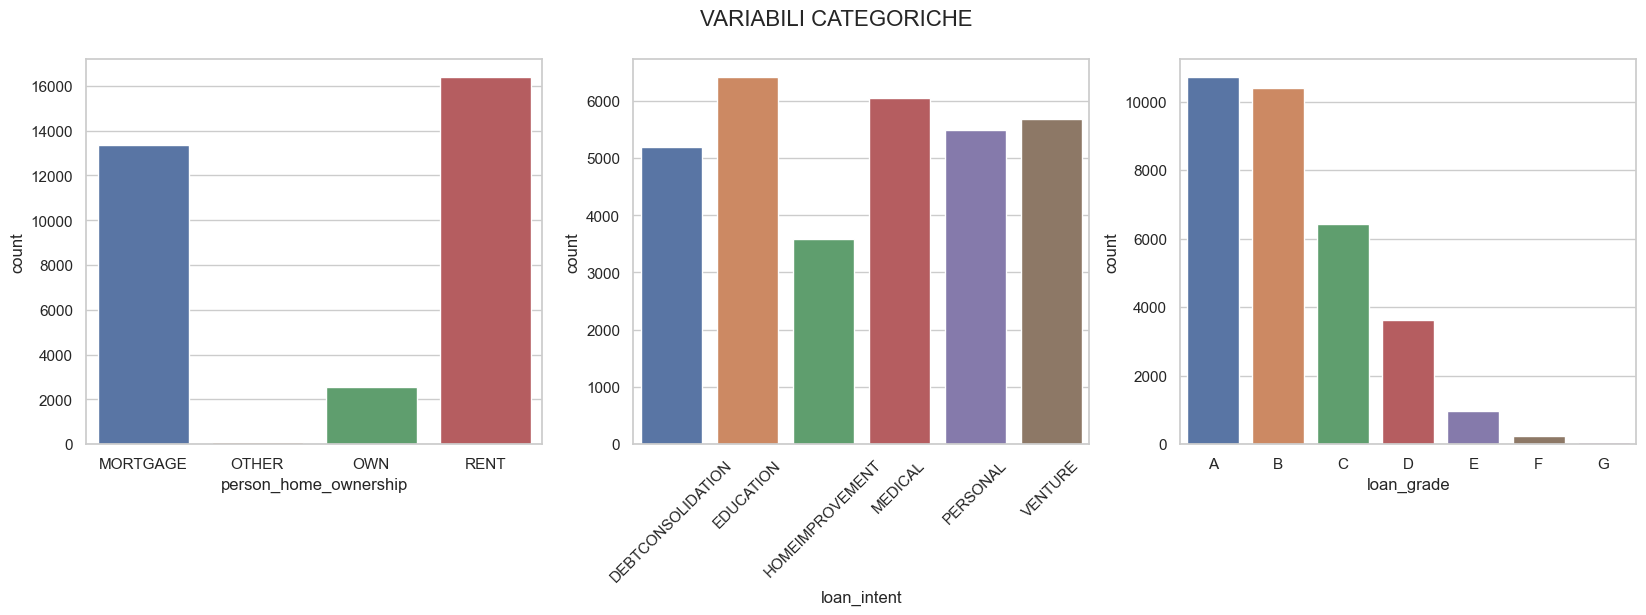

In [152]:
# creo un subplot per le tre variabili categoriche
fig,ax=plt.subplots(1,3, figsize=(20,5))
fig.suptitle('VARIABILI CATEGORICHE',fontsize=16)

# inseriisco all'interno del subplot dei grafici i countplot con un ciclo for
colonne=['person_home_ownership','loan_intent','loan_grade']

for indice,valore in enumerate(colonne): 
    sns.countplot(data=credito,x=valore,ax=ax[indice],order=credito[valore].value_counts().index.sort_values())

# sistemo visivamente il secondo grafico
ax[1].tick_params(axis='x',rotation=45);


Dai grafici si evince che:  
- nella maggioranza dei casi le persone sono in affitto oppure stanno pagando un mutuo per la casa in cui vivono (questo potrebbe influire sul rating creditizio?)  
- per quanto riguarda le causali di richiesta  dell'affidamento sono varie, ma quelle più ricorrenti sono educazione e ragioni sanitarie (questo potrebbe indicare che il df sia relativo agli USA. La causale puo' influire sul merito creditizio oppure sull'importo richiesto?)  
- per quanto riguarda il rating associato ai clienti pare che la maggior parte delle posizioni sia positiva e che poche persone sono considerate cattivi pagatori (si potrebbe cercare di capire quali fattori influenzino il rating)  


Passo all'analisi delle variabili booleane (con 1/0 e con Y/N)

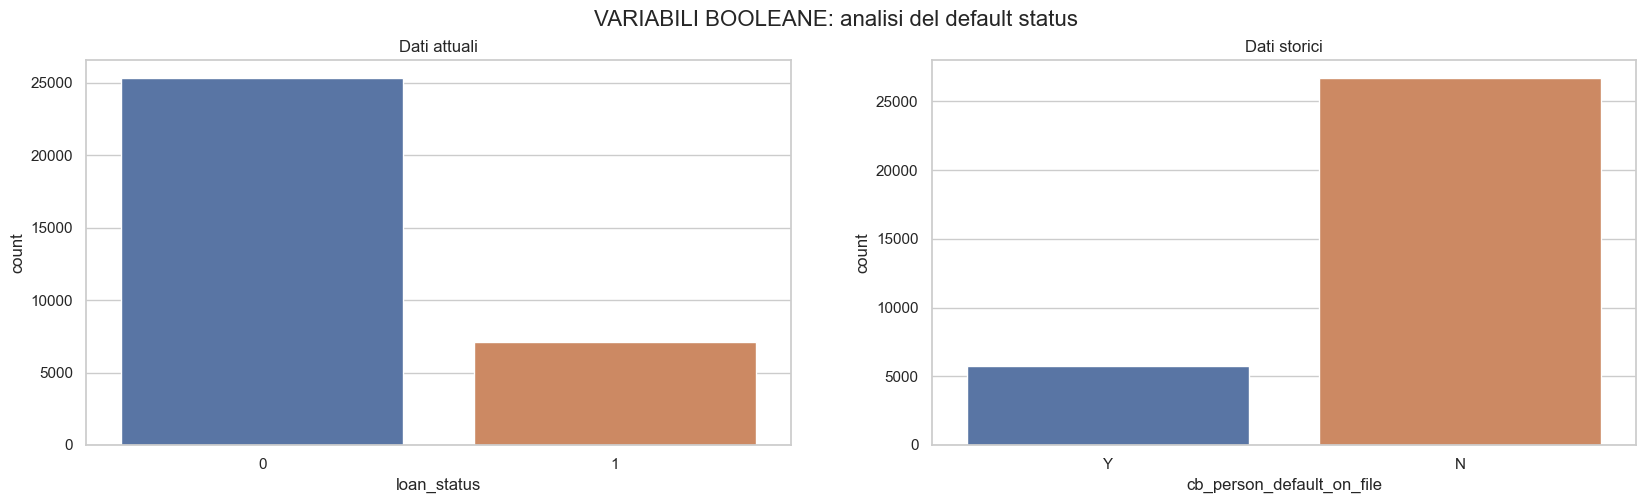

In [153]:
# Creo un sublot per visualizzare i grafici
fig,ax=plt.subplots(1,2, figsize=(20,5))
fig.suptitle('VARIABILI BOOLEANE: analisi del default status', fontsize=16)

# inserisco i countplot
colonne=['loan_status','cb_person_default_on_file']

for indice,valore in enumerate(colonne): 
    sns.countplot(data=credito,x=valore,ax=ax[indice])

ax[0].set_title('Dati attuali')
ax[1].set_title('Dati storici');

Dai grafici si evince che non ci sono valori anomali nelle due colonne (cioe' sono tutti 0/1 oppure Y/N).  
Per quanto riguada il loan status la maggior parte dei soggetti è in grado di far fronte al proprio debito e meno della metà invece sono in default; anche per quanto riguarda il dato storico (grafico a destra) pare che la maggior parte dei soggetti non abbia passati problemi di insolvenza/demerito creditizio. Si potrebbe analizzare la relazione tra passato default e situazione attuale.

Passo alle variabili numeriche

In [154]:
# visualizzo nuovamente le statistiche relative alle variabili numeriche
credito.describe().round(2)

,person_age,person_income,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32411.00,32411.00,32411.00,32411.00,32411.00,32411.00,32411.00
mean,27.73,65897.96,9593.59,11.02,0.22,0.17,5.81
std,6.21,52520.93,6322.53,3.22,0.41,0.11,4.06
min,20.00,4000.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,12250.00,13.47,0.00,0.23,8.00
max,94.00,2039784.00,35000.00,23.22,1.00,0.83,30.00


CONSIDERAZIONI SULLE VARIABILI NUMERICHE PRIMA RITENUTE PROBLEMATICHE:  
- PERSON AGE: a seguito della pulizia del df l'età massima risulta essere 94 anni. Visto che si presume che il df sia relativo agli USA ho cercato dati relativi alla max età di concessione del prestito, a quanto pare non c'è una linea generale (come in Italia) ma è a discrezione dell'agenzia e varia in base alla tipologia di affidamento; per questo motivo, come si è in precedenza mantenuta l'ètà min. di 16 anni, non toccherò nemmeno le età molto alte. Oltretutto la maggior parte dei dati si trova tra i 23 e i 30 anni.
- PERSON INCOME: il valore massimo si discosta molto dal 75% delle osservazioni, tuttavia si è di molto abbassato. Probabilmente la cosa è dovuta agli outlier che ho deciso di mantenere.  
- LOAN INT RATE: i tassi sono ancora molto alti ma per tutte le considerazioni sino ad ora fatte si mantengono tali  

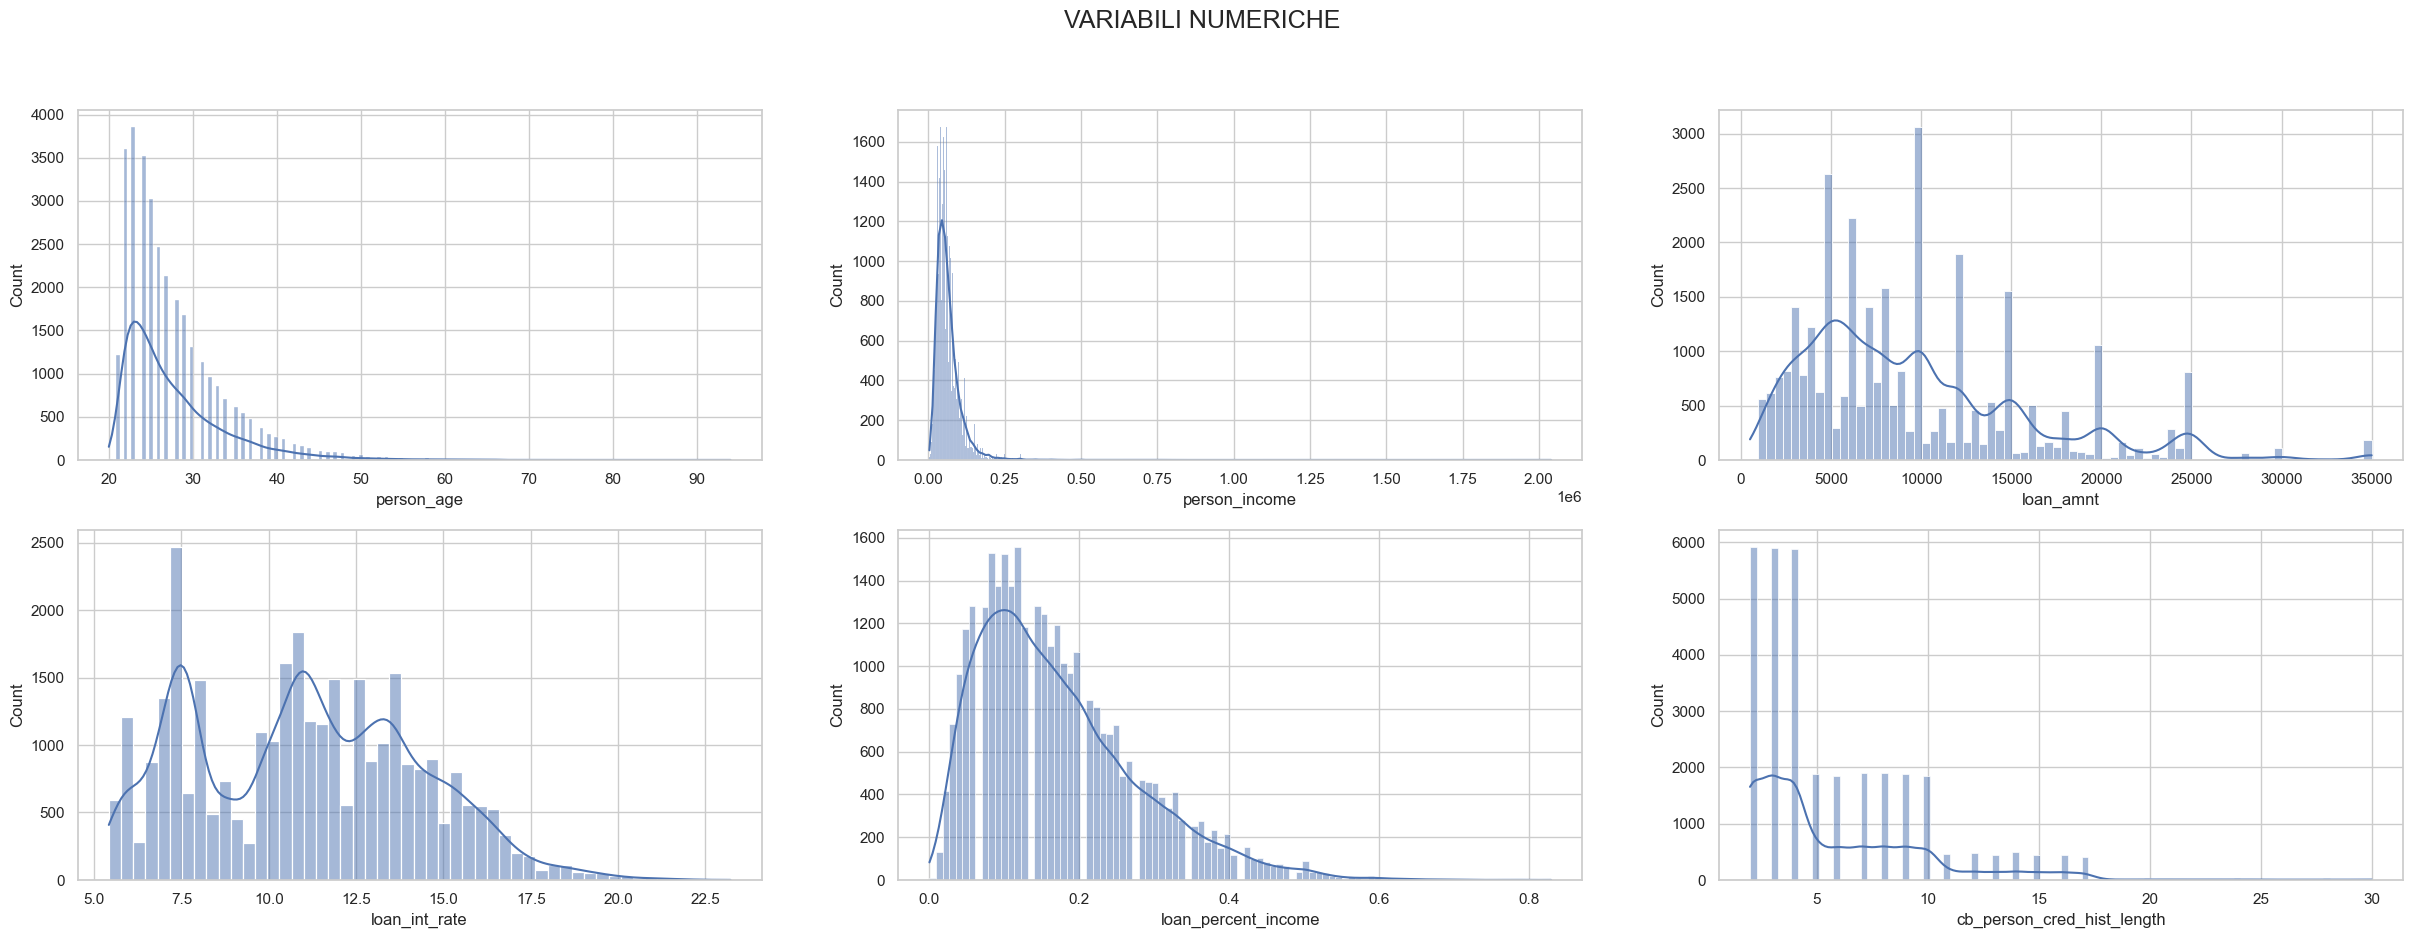

In [155]:
# VISUALIZZO NUOVAMENTE LE DISTRIBUZIONI DELLE VARIABILI NUMERICHE A SEGUITO DELLA PULIZIA DEL DF

# creo un subplot per la rappresentazione visiva delle variabili numeriche
fig,ax=plt.subplots(2,3,figsize=(30,10))
fig.suptitle('VARIABILI NUMERICHE',fontsize=18)

# inserisco degli istogrammi delle variabili numeriche nella prima riga
colonne=['person_age','person_income','loan_amnt']

for indice,valore in enumerate(colonne):
    sns.histplot(data=credito,x=valore,kde=True,ax=ax[0,indice])

# inserisco degli istogrammi delle variabili numeriche nella seconda riga
colonne=['loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

for indice,valore in enumerate(colonne):
    sns.histplot(data=credito,x=valore,kde=True,ax=ax[1,indice])

Le distribuzioni sono praticamente inalterate rispetto a quelle visionate prima della pulizia del df

# DATA EXPLORATION: ANALISI MULTIVARIATA  
Dopo aver analizzato le singole colonne passo all'analisi multivariata analizzando le relazioni tra le diverse variabili.  
Visto che lo scopo principale dello studio è quello di analizzare le posizioni in default e capire le possibili cause, analizzerò prima le relazioni che le colonne loan_status e cb_person_default_on_file hanno tra loro e rispetto alle altre.  
Successivamente analizzerò anche le altre relazioni nell'ottica di trovare KPI utili per la dashboar relativa al portafoglio crediti.

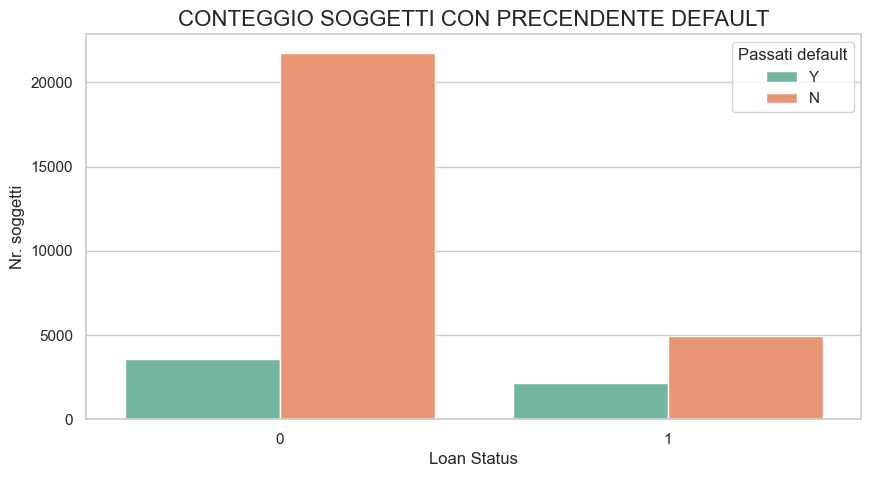

In [156]:
# Creo un barchart che mostri quanti clienti attualmente in default sono stati in default anche in passato
sns.set(style="whitegrid") # imposto lo stile del grafico
plt.figure(figsize=(10,5))

#creo il grafico
sns.countplot(x='loan_status', hue='cb_person_default_on_file', data=credito, palette='Set2') 

# Inserisco il titolo e rinomino assi e legenda
plt.title('CONTEGGIO SOGGETTI CON PRECENDENTE DEFAULT', fontsize=16) # aggiungo il titolo
plt.xlabel('Loan Status') #do un nome diverso all'asse x
plt.ylabel('Nr. soggetti') #do un nome diverso all'asse y
plt.legend(title='Passati default', loc='upper right');


In [157]:
# creo una tabella pivot con i dati numerici
tabella_pivot=credito.pivot_table(index='loan_status', columns='cb_person_default_on_file', aggfunc='size')
tabella_pivot

cb_person_default_on_file,N,Y
loan_status,,
0,21762,3560
1,4919,2170


In [158]:
# creo una tabella pivot con i dati percentuali rispetto alle righe
tabella_percentuali=round(tabella_pivot.div(tabella_pivot.sum(axis=1), axis=0) * 100,0)
tabella_percentuali

cb_person_default_on_file,N,Y
loan_status,,
0,86.0,14.0
1,69.0,31.0


I dati mostrano che solo il 31% dei soggetti oggi in defalut ha avuto passati problemi di insolvenza, mentre la maggior parte dei soggetti in default non presentano passati problemi di demerito creditizio. Quindi si può dire che il fatto di avere avuto passati problemi di insolvenza non incide in modo significativo sull'attuale stato del credito.

Provo ad indagare se ci siano relazioni tra il default status e le variabili categoriche.

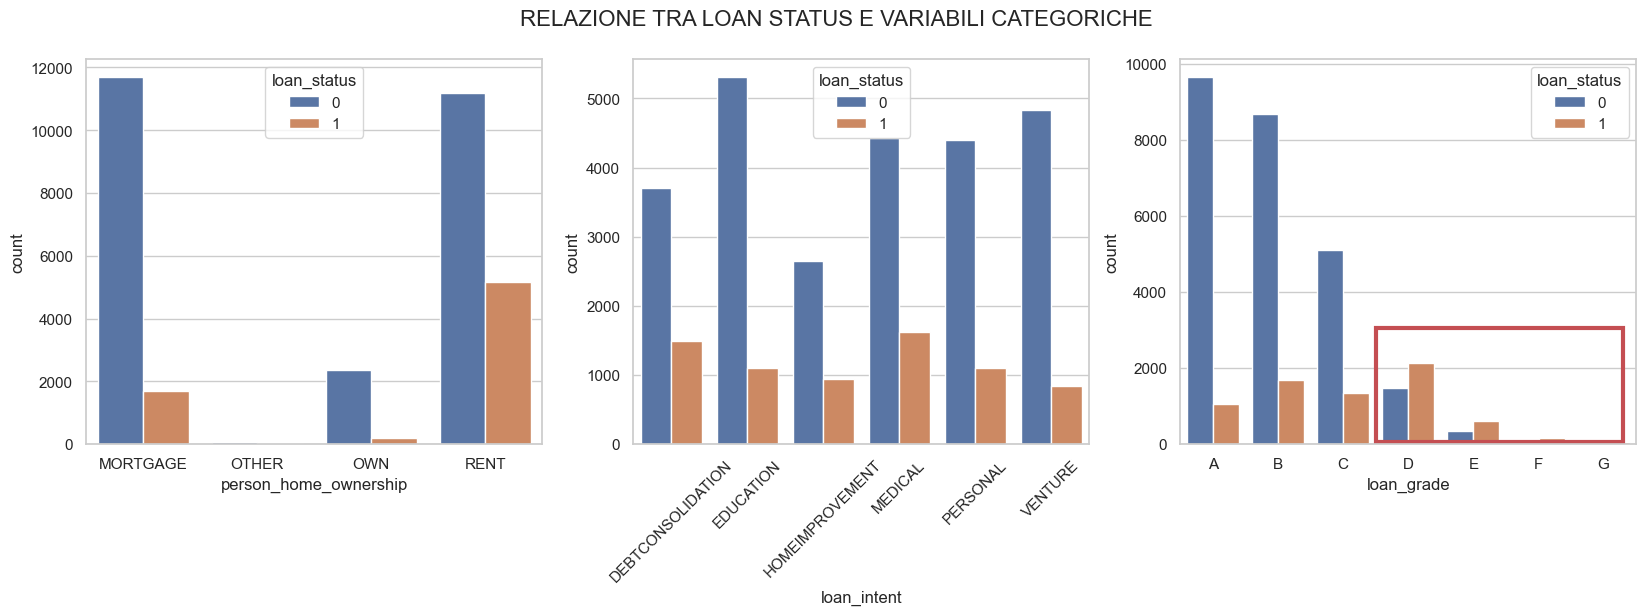

In [159]:
# imposto lo stile del grafico
sns.set(style="whitegrid") 

# creo un subplot 
fig,ax=plt.subplots(1,3, figsize=(20,5))
fig.suptitle('RELAZIONE TRA LOAN STATUS E VARIABILI CATEGORICHE',fontsize=16)

# inseriisco all'interno del subplot dei grafici i countplot con un ciclo for
colonne_titoli=['person_home_ownership','loan_intent','loan_grade']

for indice,valore in enumerate(colonne_titoli): 
    sns.countplot(data=credito,x=valore,hue='loan_status',ax=ax[indice],order=credito[valore].value_counts().index.sort_values())
   
# sistemo visivamente il secondo grafico
ax[1].tick_params(axis='x',rotation=45)

# Aggiungo un rettangolo rosso nel terzo grafico
rettangolo = patches.Rectangle((2.5,50), 3.8, 3000, linewidth=3, edgecolor='r', facecolor='none')
ax[2].add_patch(rettangolo);

Dai grafici emerge che per loang_grade superiore o uguale a D le casistiche di default siano maggiori rispetto alle posizioni sane; questo significa che al peggiorare del loan_grade aumentano le possibilità di default.  
Per quanto riguarda invece le altre variabili categoriche notiamo che:  
- chi è in affitto ha una maggiore percentuale di default rispetto alle altre categorie
- la calusale  dell'affidamento poco incide sulla possibilità di default, le due categorie maggiori sono debt consolidation e medical.

Indago ora possibili relazioni con le variabili numeriche.

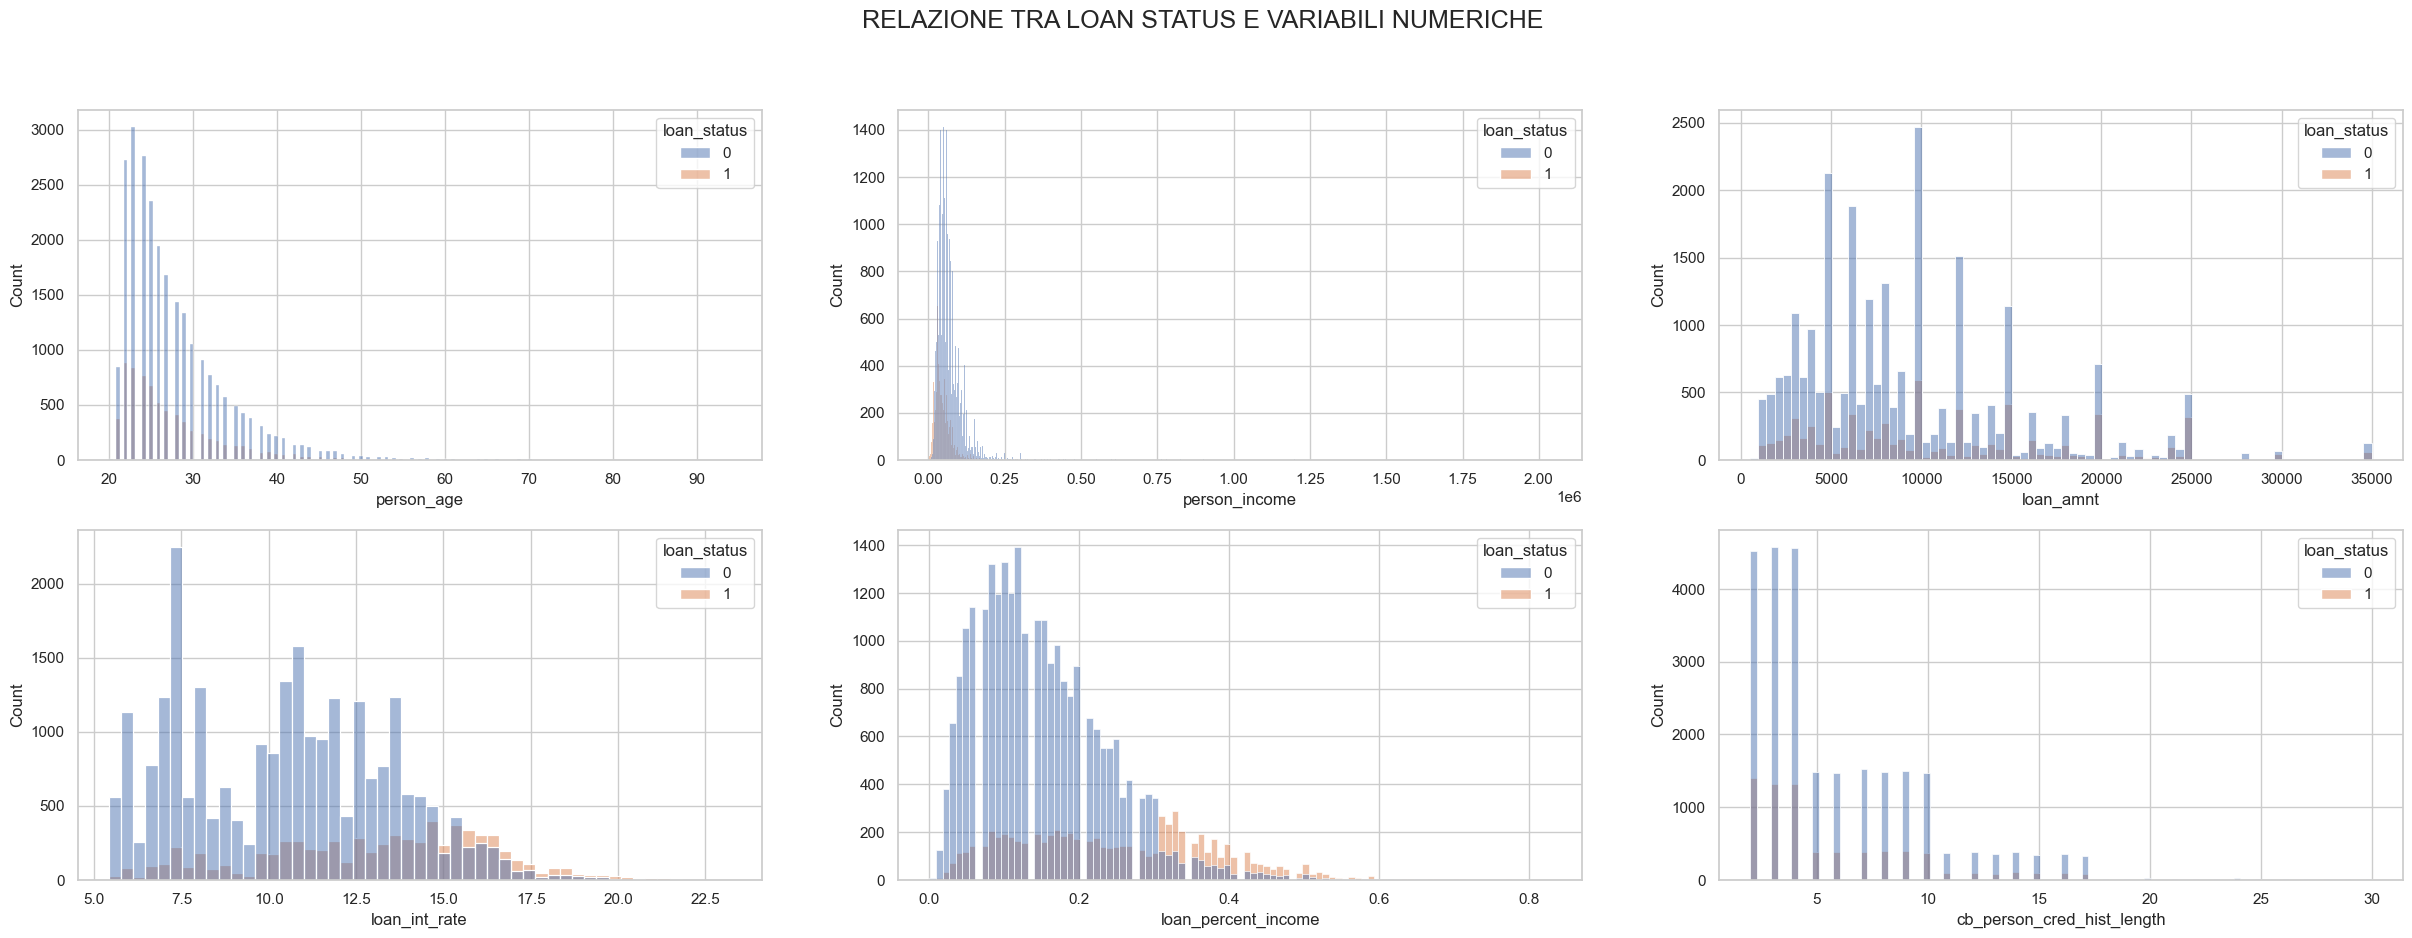

In [160]:
# creo un subplot per la rappresentazione visiva di eventuali outlier
fig,ax=plt.subplots(2,3,figsize=(30,10))
fig.suptitle('RELAZIONE TRA LOAN STATUS E VARIABILI NUMERICHE',fontsize=18)

# inserisco dei boxplot delle variabili numeriche nella prima riga
colonne=['person_age','person_income','loan_amnt']

for indice,valore in enumerate(colonne):
    sns.histplot(x=valore, hue='loan_status', data=credito,ax=ax[0, indice])

# inserisco dei boxplot delle variabili numeriche nella seconda riga
colonne=['loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

for indice,valore in enumerate(colonne):
    sns.histplot(x=valore, hue='loan_status', data=credito,ax=ax[1, indice])

Dai grafici noto anzitutto che per elevati tassi di interesse e percentuali prestito/reddito le posizioni in default sono maggiori di quelle sane; posso quindi affermare che all'aumentare di questi due fattori aumenta anche il rischio di default del soggetto.  
In tutti gli altri casi, salvo quanche piccola eccezione per i redditi più bassi, le posizioni sane risultano essere maggiori di quelle in sofferenza.

Possiamo quindi affermare che il tasso di interesse e la percentuale di fido rispetto al reddito sono due fattori che influenzano la probabilità di default e sui quali si dovrà porre maggiore attenzione in fase di delibera dell'affidamento.

# DATA TRASFORMATION E CONTINUO DELL'ANALISI MULTIVARIATA  
Aggiungo ora una colonna al df che indichi l'età alla quale è stato concesso il primo affidamento per capire se anche questa incida o meno sulla possibilità di default. Per farlo sottraggo all'età dei soggetti la durata della loro storia creditizia (per valori pari a zero si presume che la rilevazione fatta sia la prima).

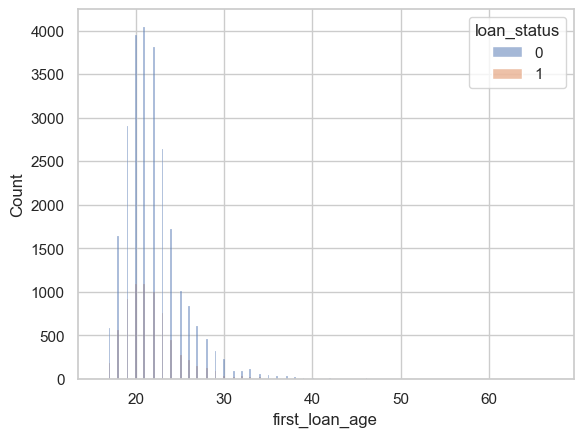

In [161]:
# aggiungo la colonna first_loan_age
credito['first_loan_age']=credito['person_age']-credito['cb_person_cred_hist_length']

# creo l'istogramma per visualizzare la relazione tra la variabile creata e il loan_status
sns.histplot(x='first_loan_age', hue='loan_status', data=credito);

Le due distribuzioni risultano sovraposte, quindi l'età di concessione del primo affidamento non influisce sulla possibilità di default.

**CONCLUSIONI SUI NPL:** i fattori che maggiormente influenzano la probabilità di default sono: cattivo rating, tasso di interesse, reddito e ammontare di fido rispetto al reddito.

Dopo aver individuato i fattori che influenzano il passaggio a NPL della posizione passo all'analisi multivariata delle altre variabili al fine di individuare dei KPI utili a monitorare la salute del portafoglio.

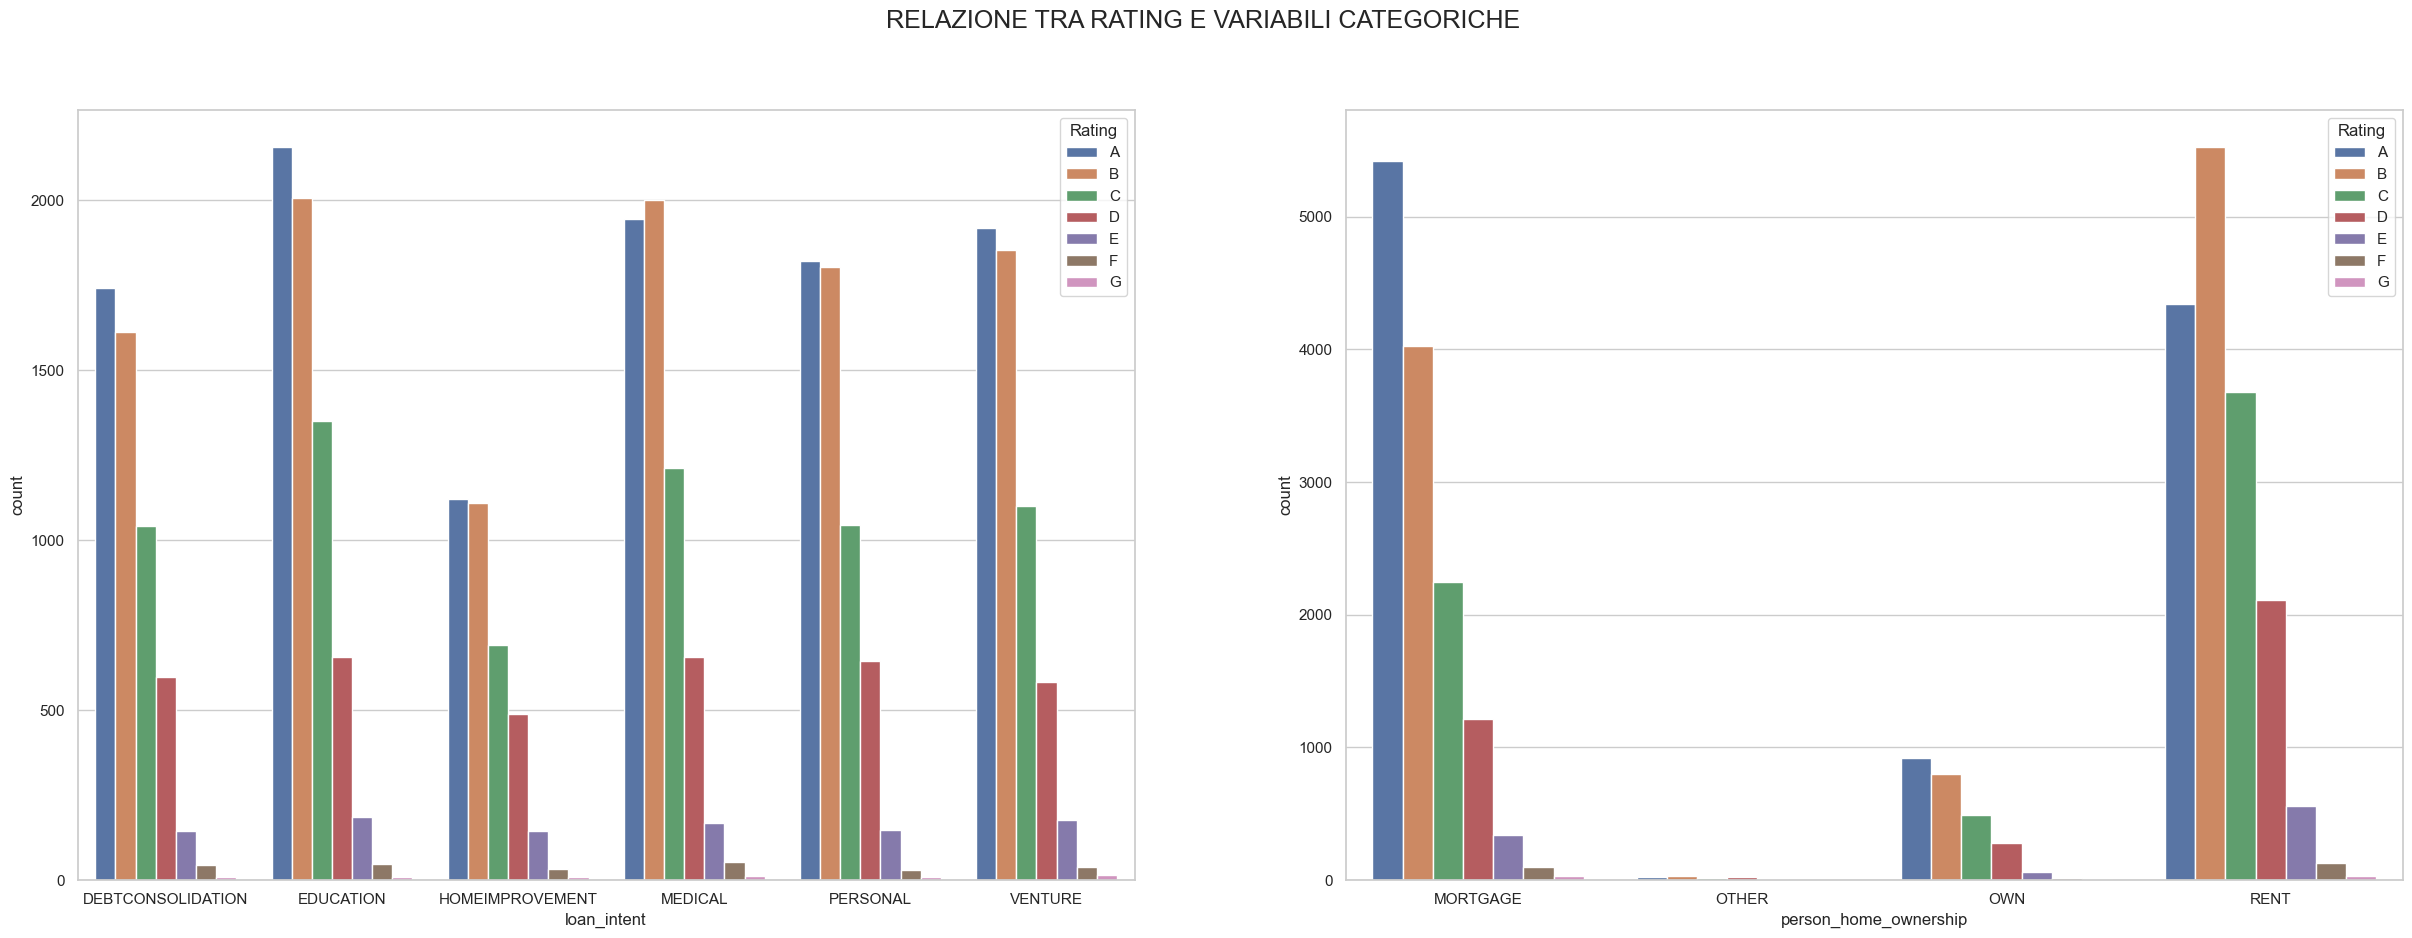

In [162]:
# Creo un subplot per il rating e altre variabili categoriche
fig,ax=plt.subplots(1,2,figsize=(30,10))
fig.suptitle('RELAZIONE TRA RATING E VARIABILI CATEGORICHE',fontsize=18)

# Ordino nel df le colonne 'loan_grade' in modo alfabetico
credito['loan_grade'] = pd.Categorical(credito['loan_grade'], categories=sorted(credito['loan_grade'].unique()))

colonne=['loan_intent','person_home_ownership']

for indice,valore in enumerate(colonne):
    sns.countplot(data=credito, x=valore, hue='loan_grade', order=sorted(credito[valore].unique()),ax=ax[indice])
    ax[indice].legend(title='Rating', loc='upper right')

Dai grafici si può notare che tutte le fasce di rating sono decrescenti e distribuite uniformemente rispetto alle singole causali e tipologie di proprietà. Fanno eccezione a questa logica i prestiti concessi per motivi sanitari e quelli concessi in presenza di affitti.

Per meglio capire la relazione tra rating e variabili numeriche verrà assegnato ad ogni lettera rappresentativa del rating un punteggio da 1 a 7, in questo modo sarà possibile creare una matrice di correlazione tra loan_grade e variabili numeriche.  
Dato che il rating rappresenta un volore sintetico del rischio associato al cliente, maggiore sarà il punteggio assegnato tanto maggiore sarà il rischio associato al cliente (A=1,...,G=7).

In [163]:
# Aggiungo la colonna rating numerico
conversione_rating={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}

# Creo una nuova colonna rating basata sulla colonna loan_grade
credito['rating'] = credito['loan_grade'].map(conversione_rating)
credito['rating'] = credito['rating'].astype(int)
credito.sample(10)

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,first_loan_age,rating
27313,28,140000,MORTGAGE,HOMEIMPROVEMENT,E,25000,15.950000,0,0.18,N,10,18,5
21522,34,50000,MORTGAGE,VENTURE,C,16000,13.490000,0,0.32,Y,5,29,3
29624,41,24000,RENT,DEBTCONSOLIDATION,D,4000,16.070000,1,0.17,N,14,27,4
8332,25,53000,RENT,EDUCATION,B,7500,10.390000,0,0.14,N,4,21,2
25466,30,36000,OWN,HOMEIMPROVEMENT,C,4000,13.490000,0,0.11,N,10,20,3
32407,54,120000,MORTGAGE,PERSONAL,A,17625,7.490000,0,0.15,N,19,35,1
28318,27,20000,RENT,PERSONAL,C,3250,13.490402,1,0.16,N,5,22,3
9854,25,40000,RENT,PERSONAL,C,9000,12.530000,0,0.22,N,2,23,3
19651,28,54263,RENT,HOMEIMPROVEMENT,C,3500,11.660000,0,0.06,N,5,23,3
16675,24,47000,RENT,VENTURE,A,7000,6.620000,0,0.15,N,4,20,1


In [164]:
credito['rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32411 entries, 0 to 32410
Series name: rating
Non-Null Count  Dtype
--------------  -----
32411 non-null  int32
dtypes: int32(1)
memory usage: 126.7 KB


In [165]:
# Calcolo del rating medio di portafoglio
rating_medio = round(credito['rating'].mean(), 0)

# Calcolo del rating medio per posizioni in salute e NPL
rating_per_status = credito.groupby('loan_status')['rating'].mean().round(0)

# Stampa i risultati
print(f"Il rating medio dell'intero portafoglio è {rating_medio}")
print(f"Il rating medio delle posizioni in salute è {rating_per_status[0]}")
print(f"Il rating medio delle posizioni NPL è {rating_per_status[1]}")

Il rating medio dell'intero portafoglio è 2.0
Il rating medio delle posizioni in salute è 2.0
Il rating medio delle posizioni NPL è 3.0


C:\Users\aless\AppData\Local\Temp\ipykernel_24952\4024257001.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_correlazione = credito.corr()


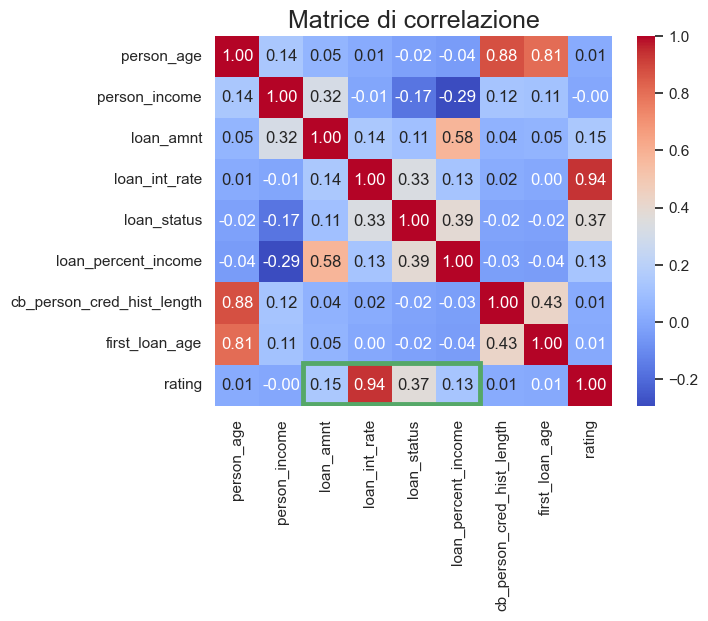

In [166]:
# creo una matrice di correlazione e la visualizzo con un heatmap
matrice_correlazione = credito.corr()

sns.heatmap(matrice_correlazione,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di correlazione',fontsize=18)

# Aggiungere un rettangolo
rect = Rectangle((2, 7.95), 4, 1, linewidth=3.5, edgecolor='g', facecolor='none')
plt.gca().add_patch(rect);

La matrice di correlazione evidenzia come il rating sia positivamente correlato con i tre fattori identificati in precedenza come indicativi di potenziale default: importo, tasso di interesse, status e percentuale importo/reddito. Questo risultato non mi stupisce, anzi era prevedibile in quanto il rating è un indice sintetico di rischio. Rispetto alle altre variabili numeriche non ci sono correlazioni.

Rispetto alle altre forti correlazioni positive e negative non risultano particolari anomalie, i risultati infatti sono in linea con quanto ci si potrebbe aspettare.

In [167]:
# In base al rating calcolo le medie di: età, età prima richiesta, importo, income, % income e tasso di interesse
credito.pivot_table(index='loan_grade', 
                    values=['person_age', 'first_loan_age', 'loan_amnt', 'person_income', 'loan_int_rate','loan_percent_income'], 
                    aggfunc={'person_age': 'mean', 'first_loan_age': 'mean', 'loan_amnt': 'mean', 'person_income': 'mean', 'loan_int_rate': 'mean','loan_percent_income':'mean'}).round({'person_age': 0, 'first_loan_age': 0, 'loan_amnt': 2, 'person_income': 2, 'loan_int_rate': 2,'loan_percent_income':2})

,first_loan_age,loan_amnt,loan_int_rate,loan_percent_income,person_age,person_income
loan_grade,,,,,,
A,22.0,8545.70,7.33,0.15,28.0,66605.84
B,22.0,9990.65,11.00,0.18,28.0,66317.06
C,22.0,9220.52,13.47,0.17,28.0,64012.98
D,22.0,10855.76,15.36,0.19,28.0,63703.10
E,22.0,12919.91,17.01,0.21,28.0,70856.36
F,22.0,14717.32,18.63,0.22,28.0,77008.73
G,22.0,17195.70,20.26,0.25,28.0,76773.30


Dalla tabella emerge che i rating peggiori si hanno in corrispondenza di maggiori importi richiesti e della maggiore percentuale loan/income, risulta però interessante che i prestiti con peggior rating siano quelli in corrispondenza dei maggiori redditi.  
Per quanto riguarda gli altri dati sono in linea con le aspettative.

In [168]:
# visualizzo i dati statistici riguardanti le età
credito[['person_age','first_loan_age']].describe().round(0)

,person_age,first_loan_age
count,32411.0,32411.0
mean,28.0,22.0
std,6.0,3.0
min,20.0,16.0
25%,23.0,20.0
50%,26.0,21.0
75%,30.0,23.0
max,94.0,67.0


In [169]:
# In base alla causale calcolo le medie di: età, età prima richiesta, importo, income, rating e tasso di interesse
credito.pivot_table(index='loan_intent', 
                    values=['person_age', 'first_loan_age', 'loan_amnt', 'person_income', 'loan_int_rate','rating','loan_percent_income'], 
                    aggfunc={'person_age': 'mean', 'first_loan_age': 'mean', 'loan_amnt': 'mean', 'person_income': 'mean', 'loan_int_rate': 'mean','rating': 'mean','loan_percent_income':'mean'}).round({'person_age': 0, 'first_loan_age': 0, 'loan_amnt': 2, 'person_income': 2, 'loan_int_rate': 2,'rating': 0,'loan_percent_income':2})

,first_loan_age,loan_amnt,loan_int_rate,loan_percent_income,person_age,person_income,rating
loan_intent,,,,,,,
DEBTCONSOLIDATION,22.0,9605.27,11.02,0.17,28.0,66503.47,2.0
EDUCATION,21.0,9478.89,10.97,0.17,27.0,64106.85,2.0
HOMEIMPROVEMENT,23.0,10362.12,11.22,0.17,29.0,73575.11,2.0
MEDICAL,22.0,9271.58,11.05,0.18,28.0,61476.83,2.0
PERSONAL,22.0,9580.52,10.99,0.17,28.0,66741.34,2.0
VENTURE,22.0,9581.25,10.95,0.17,28.0,66394.77,2.0


Interessante il fatto che l'età media della prima richiesta di fido per ragioni mediche sia 22 anni, il dato è certamente inaspettato ma probabilmente dovuto al fatto che la maggior parte delle rilevazioni sia tra i 20 e i 23 anni. Inoltre l'età media al tempo della rilevazione si attesta intorno ai 28 anni per quasi tutte le categorie.  
In generale sia il tasso sia l'ammontare di affidamento non si discostano moltro tra le varie causali, così come il reddito. Spicca tra tutte però la causale home improvement dove si registrano i dati medi più elevati.

In [170]:
# In base al tipo di proprietà immobiliare calcolo le medie di: età, età prima richiesta, importo, income, rating e tasso di interesse
credito.pivot_table(index='person_home_ownership', 
                    values=['person_age', 'first_loan_age', 'loan_amnt', 'person_income', 'loan_int_rate','rating','loan_percent_income'], 
                    aggfunc={'person_age': 'mean', 'first_loan_age': 'mean', 'loan_amnt': 'mean', 'person_income': 'mean', 'loan_int_rate': 'mean','rating': 'mean','loan_percent_income':'mean'}).round({'person_age': 0, 'first_loan_age': 0, 'loan_amnt': 2, 'person_income': 2, 'loan_int_rate': 2,'rating': 0,'loan_percent_income':2})

,first_loan_age,loan_amnt,loan_int_rate,loan_percent_income,person_age,person_income,rating
person_home_ownership,,,,,,,
MORTGAGE,22.0,10582.59,10.50,0.15,28.0,80699.29,2.0
OTHER,22.0,11028.07,12.15,0.19,27.0,76561.27,3.0
OWN,22.0,9031.10,10.87,0.19,28.0,57858.83,2.0
RENT,22.0,8865.02,11.46,0.18,28.0,55004.79,2.0


Per quanto riguarda la proprietà immobiliare le medie maggiori si registrano per mutuo e altro tipo di proprietà. Provo a vedere se la tipologia di proprietà della casa incida o meno sulla richiesta di mutuo per ristrutturazione o per consolidamento dei debiti.  
Mi aspetto che la maggior parte dei fidi per ristrutturazione siano richiesti da chi ha case di proprietà o acquistate con mutuo; mentre per quanto riguarda il consolidamento delle posizioni debitorie potrebbero essere maggiormente richieste da chi è in affitto, in quanto il soggetto potrebbe essere in affitto perchè non riesce a chiedere il mutuo visti i debiti già in essere.

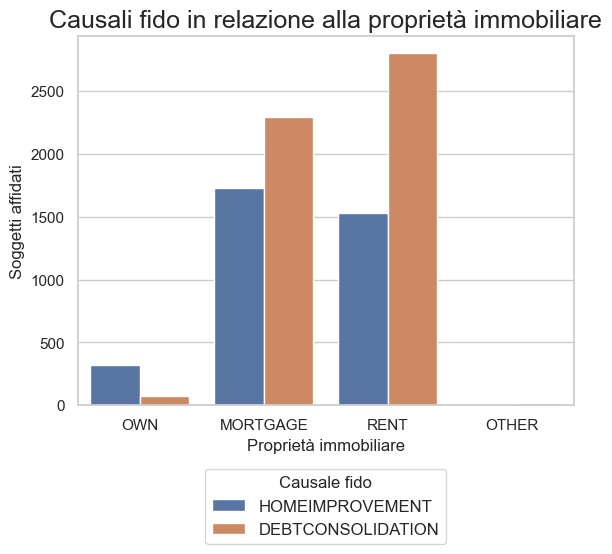

In [171]:
# Creo un countplot per verificare le mie ipotesi
sns.countplot(data=credito[(credito['loan_intent']=='DEBTCONSOLIDATION')|(credito['loan_intent']=='HOMEIMPROVEMENT')], x='person_home_ownership', hue='loan_intent')

# Formatto il grafico
plt.title('Causali fido in relazione alla proprietà immobiliare',fontsize=18)
plt.xlabel('Proprietà immobiliare')
plt.ylabel('Soggetti affidati')
plt.legend(title='Causale fido', fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15));


Per quanto riguarda la ristrutturazione le mie aspettative sono state parzialmente rispettate in quanto la maggior parte dei richiedenti fidi a questo scopo hanno comunque acquistato una casa tramite mutuo, tuttavia inaspettatamente anche chi ha una casa in affitto richiede mutui per ristrutturazione.  
Per quanto riguarda il consolidamento della posizione debitoria invece i maggiori richiedenti sono quelli che hanno una casa in affitto.

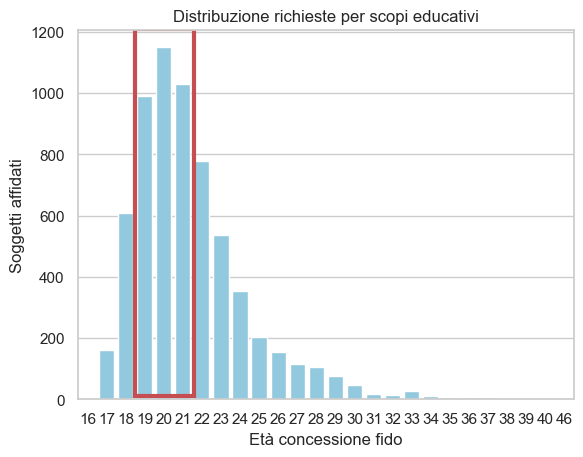

In [172]:
# Visualizzo la distribuzione dei crediti per scopi educativi in base alle età in cui è stato concesso il fido
grafico = sns.countplot(data=credito[credito['loan_intent']=='EDUCATION'], x='first_loan_age',color='skyblue')

# Formatto il grafico con i nomi degli assi
grafico.set(title='Distribuzione richieste per scopi educativi', xlabel='Età concessione fido', ylabel='Soggetti affidati')

# Aggiungo un rettangolo rosso che evidenzi i dati di interesse
rettangolo = patches.Rectangle((2.5, 10), 3.1, 1200, linewidth=3, edgecolor='r', facecolor='none')
plt.gca().add_patch(rettangolo);

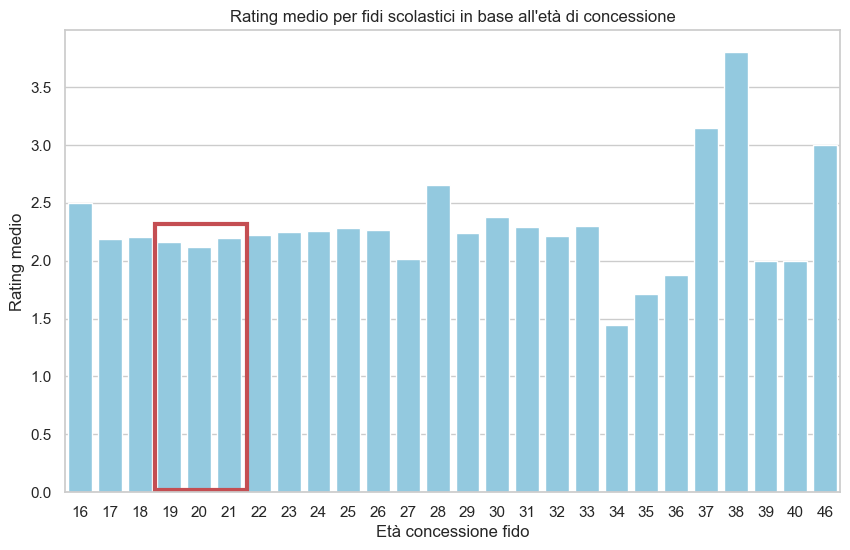

In [173]:
# Calcolo la media del rating per ogni età utilizzando pivot_table
tabella_pivot = credito[credito['loan_intent']=='EDUCATION'].pivot_table(index='first_loan_age', values='rating', aggfunc='mean')
tabella_pivot = tabella_pivot.reset_index()

# Crea un bar plot con Seaborn
plt.figure(figsize=(10, 6))
grafico1 = sns.barplot(data=tabella_pivot, x='first_loan_age', y='rating', color='skyblue')

grafico1.set(title='Rating medio per fidi scolastici in base all\'età di concessione', xlabel='Età concessione fido', ylabel='Rating medio')

# Aggiungo un rettangolo rosso che evidenzi i dati di interesse
rettangolo1 = patches.Rectangle((2.5, 0.02), 3.1, 2.3, linewidth=3, edgecolor='r', facecolor='none')
plt.gca().add_patch(rettangolo1);


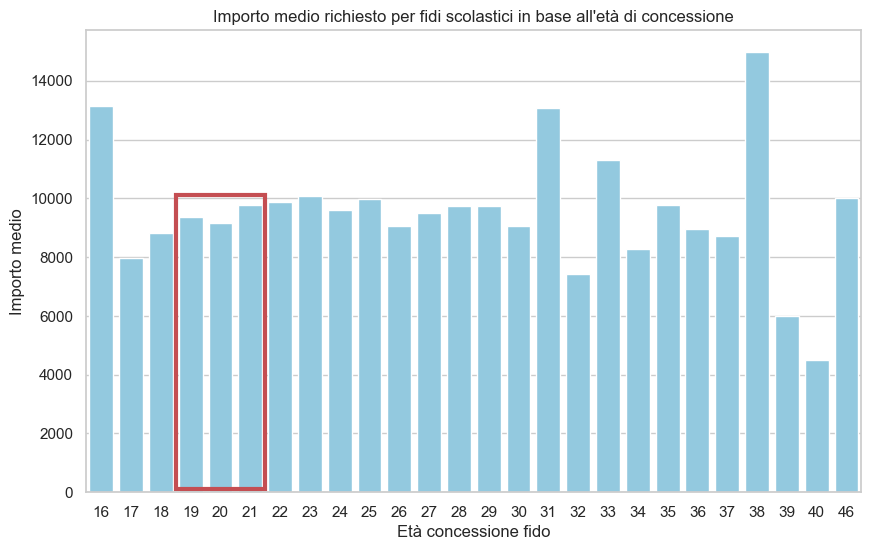

In [174]:
# Calcolo la media dell'importo concesso per ogni età utilizzando pivot_table
tabella_pivot = credito[credito['loan_intent']=='EDUCATION'].pivot_table(index='first_loan_age', values='loan_amnt', aggfunc='mean')
tabella_pivot = tabella_pivot.reset_index()

# Crea un bar plot con Seaborn
plt.figure(figsize=(10, 6))
grafico1 = sns.barplot(data=tabella_pivot, x='first_loan_age', y='loan_amnt', color='skyblue')

grafico1.set(title='Importo medio richiesto per fidi scolastici in base all\'età di concessione', xlabel='Età concessione fido', ylabel='Importo medio')

# Aggiungo un rettangolo rosso che evidenzi i dati di interesse
rettangolo1 = patches.Rectangle((2.5, 100), 3, 10000, linewidth=3, edgecolor='r', facecolor='none')
plt.gca().add_patch(rettangolo1);


# CONCLUSIONI  
Dall'analisi svolta sono stati rilevati quattro principali fattori che influenzano la probabilità di default:  
- cattivo rating
- elevato tasso di interesse
- basso reddito
- elevata percetuale reddito/importo richiesto  

Sarà utile quindi monitorarli tramite una dashboar apposita per capire come gestire posizioni che sono già in stato di default e per monitorare l'eventuale risanamento delle stesse.  
Il rating oltretutto rappresenta un giudizio sintetico circa la rischiosità del cliente, quindi potrebbe essere utile sviluppare un modello che calcoli il rating in base ai dati storici in modo da prevedere eventuali downgrade o upgrade delle posizioni.

Per quanto riguarda l'intero portafoglio crediti sono emersi dei risultati in linea con le aspettative e dei risultati inaspettati, potrebbe pertanto essere utile creare una dashboard che monitori l'intero portafoglio dell'agenzia al fine di indagare periodicamente sia lo stato di salute del portafoglio sia possibili cluster di clienti a cui proporre soluzioni di fido personalizzate.  

*Esempi soluzioni personalizzate:*  
Nella maggior parte dei casi sono stati richiesti fidi per ristrutturazione per clienti con mutui in essere, si potrebbe studiare un pacchetto mutuo + ristrutturazione a tassi agevolati che attiri nuovi clienti sia tramite surroga del loro mutuo in altri istituti per competitività di tasso sia nuovi clienti che decidono di acquistare case da ristrutturare.

Proporre pacchetti ad hoc per studenti in determinate fasce di età a tassi agevolati per fidi studenteschi entro certi importi; dall'indagine è emerso che la maggior parte dei crediti a fini educativi sono richiesti tra i 19 e i 21 anni quindi presumibilmente per frequentare l'università. Visto che il rating medio per queste fasce di età è comunque alto (B) si potrebbero proporre dei tassi agevolati in un ottica di attirare più clienti e avere dare al mercato un'immagine più in linea con i valori ESG.